# LLM

SEOYEON CHOI  
7/20/23

# Import

In [1]:
import pandas as pd
import torch
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

In [2]:
import os
import re
import string
import json
import numpy as np
from sklearn import metrics
from bs4 import BeautifulSoup
import transformers
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, AutoTokenizer, BertModel, BertConfig, AutoModel, AdamW
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

# Data

ref:
[kaggle](https://www.kaggle.com/datasets/mazlumi/mbti-personality-type-twitter-dataset/code)

In [3]:
df2 = pd.read_csv('./dataset/twitter_MBTI.csv').iloc[:,1:]

In [4]:
df2

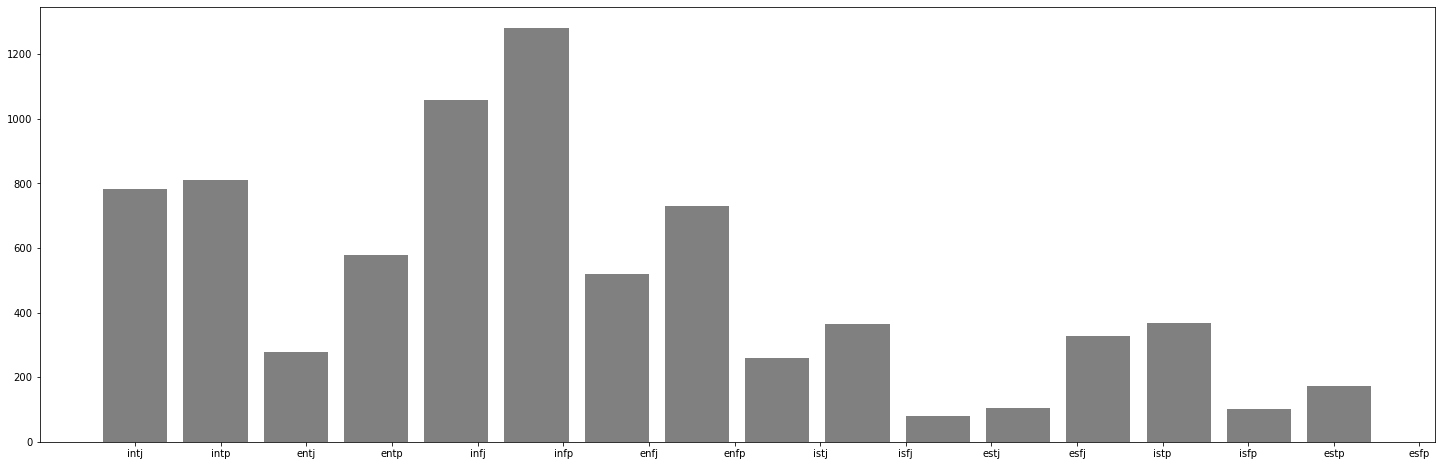

In [5]:
plt.figure(figsize=(25, 8))
plt.hist(df2['label'],color='grey', align='left', rwidth=0.8,bins=16)

In [6]:
df2['word_count'] = df2['text'].apply(lambda x: len(x.split()))

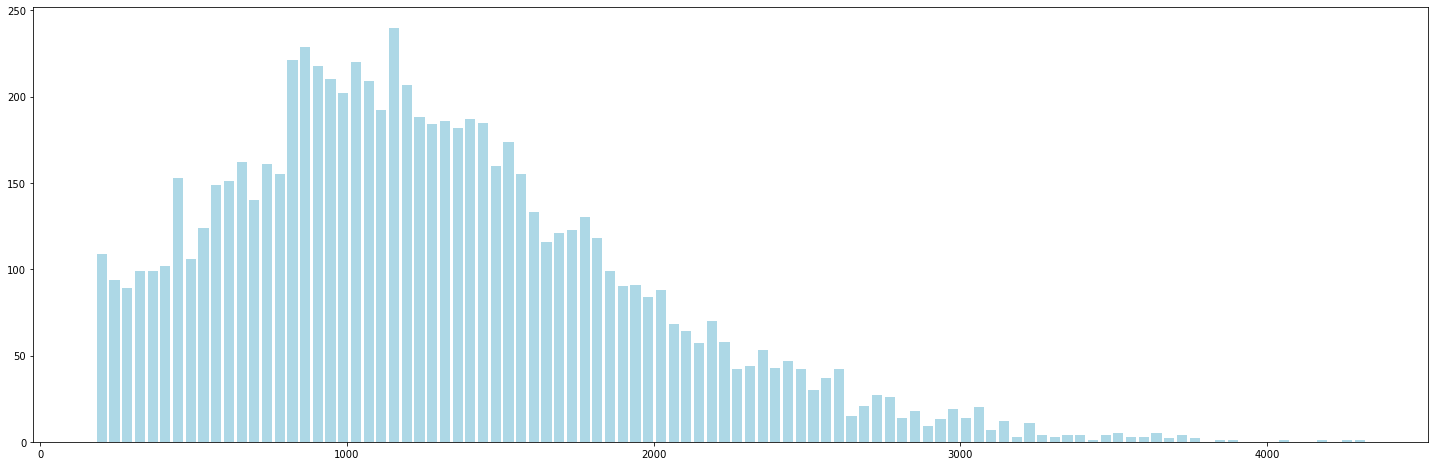

In [7]:
plt.figure(figsize=(25, 8))
plt.hist(df2['word_count'],color='lightblue', align='left', rwidth=0.8,bins=100)

In [8]:
# Split the DataFrame into train and test sets
train_data, test_data = train_test_split(df2, test_size=0.1, random_state=42)

# Encode the labels using LabelEncoder
le = LabelEncoder()
le.fit(df2['label'].unique())
train_data['label'] = le.transform(train_data['label'])
test_data['label'] = le.transform(test_data['label'])

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Fit and transform the text data
X_train = vectorizer.fit_transform(train_data['text'])
X_test = vectorizer.transform(test_data['text'])

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame from the feature names and their corresponding TF-IDF scores
tfidf_scores = pd.DataFrame(X_train.toarray(), columns=feature_names)

# Group the data by label and calculate the mean of each feature for each label
mean_tfidf_by_label = tfidf_scores.groupby(train_data['label']).mean()

# Display the top 10 features for each label
for idx, row in mean_tfidf_by_label.iterrows():
    label_idx = int(idx)
    label = le.inverse_transform([label_idx])[0]
    print(f"Top 10 features for label {label}:")
    print(row.nlargest(10))
    print("\n")

Top 10 features for label enfj:
https     0.544064
like      0.088445
just      0.073376
im        0.062178
love      0.054354
don       0.045868
good      0.044032
people    0.038759
thank     0.037399
think     0.036237
Name: 0.0, dtype: float64


Top 10 features for label enfp:
https    0.544385
like     0.087725
im       0.075049
just     0.074734
love     0.055559
good     0.045889
don      0.043349
thank    0.040182
lt       0.039768
know     0.035386
Name: 1.0, dtype: float64


Top 10 features for label entj:
https     0.541774
like      0.085349
just      0.075224
im        0.059616
don       0.046998
love      0.045708
good      0.043065
know      0.040048
people    0.037159
thank     0.036534
Name: 2.0, dtype: float64


Top 10 features for label entp:
https     0.542707
like      0.081749
just      0.073859
im        0.061867
love      0.054395
good      0.046557
don       0.043300
thank     0.041849
lt        0.040374
people    0.035310
Name: 3.0, dtype: float64


Top 10 fea

https://wikidocs.net/152922

https://dacon.io/codeshare/5619

https://www.kaggle.com/code/debarshichanda/bert-multi-label-text-classification

In [15]:
one = pd.get_dummies(df2['label'], prefix='label')

In [19]:
df3 = pd.concat([df2,one],axis=1)

In [22]:
df3.head()

In [27]:
df3.iloc[1,0]